# package_LAB

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from ipywidgets import FloatSlider
from IPython.display import display, clear_output
from ipywidgets import FloatSlider, Output

import package_LAB 
import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_LAB import LL_RT, PID_RT, Derivative_Action, Proportional_Action, Integral_Action, IMCTuning, Margin_gain_phase

# LL_RT()

In [18]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

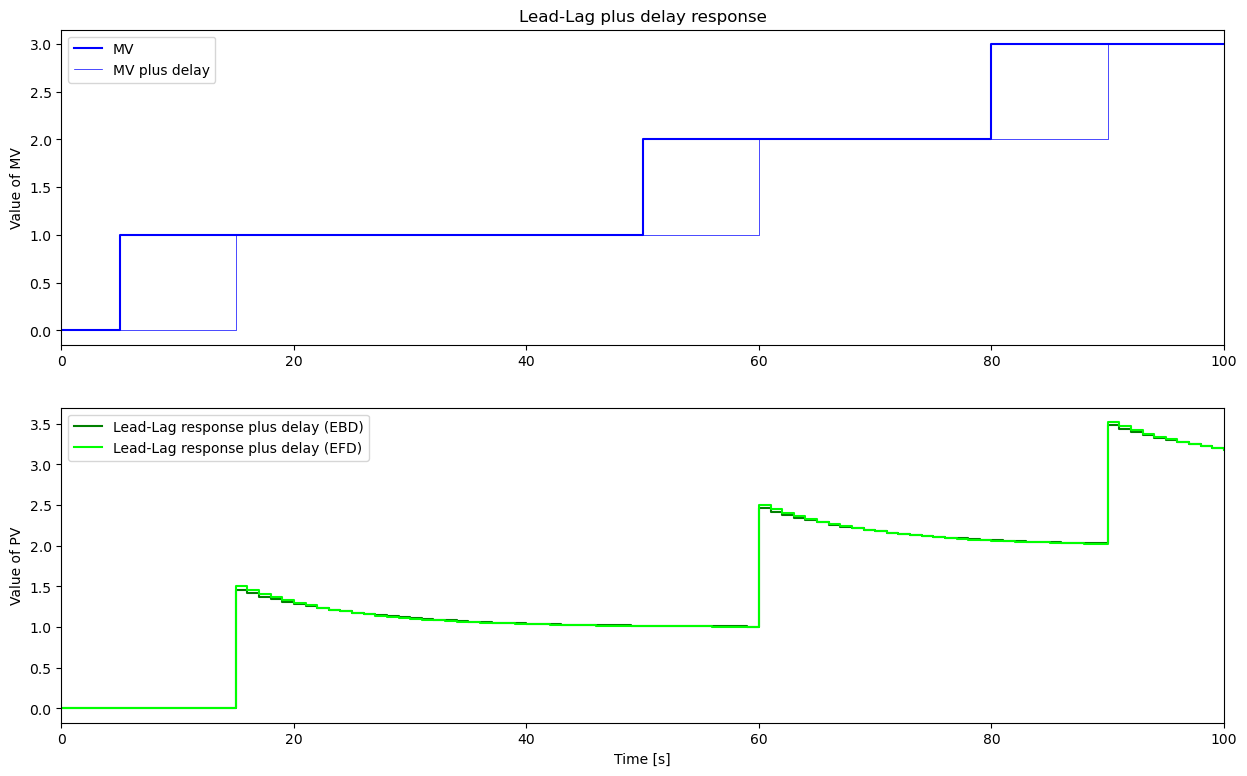

In [19]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
#PV_TRAP = []

# Parameters
Kp = 1
Tlead = 15
Tlag = 10
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)
    LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    #LL_RT(MVDelay,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead-Lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead-Lag response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead-Lag response plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

# PID_RT()

In [20]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    :SP: SP (or SetPoint) vector
    :PV: PV (or Process Value) vector
    :Man: Man (or Manual controller mode) vector (True or False)
    :MVMan: MVMan (or Manual value for MV) vector
    :MVFF: MVFF (or Feedforward) vector
    :Kc: controller gain
    Ti: integral time constant [s]
    Td: derivative time constant [s]
    :alpha: Tfd alpha*Td where Tfd is the derivative filter time constant [s]
    :Ts: sampling period [s]
    :MVMin: minimum value for MV (used for saturation and anti wind-up) :MVMax: maximum value for MV (used for saturation and anti wind-up)
    :MV: MV (or Manipulated Value) vector
    :MVP: MVP (or Propotional part of MV) vector
    :MVI: MVI (or Integral part of MV) vector
    :MVD: MVD (or Derivative part of MV) vector
    :E: E (or control Error) vector
    :ManFF: Activated FF in 

MVP Empty
MVI Empty
MVD Empty


(0.0, 1500.0)

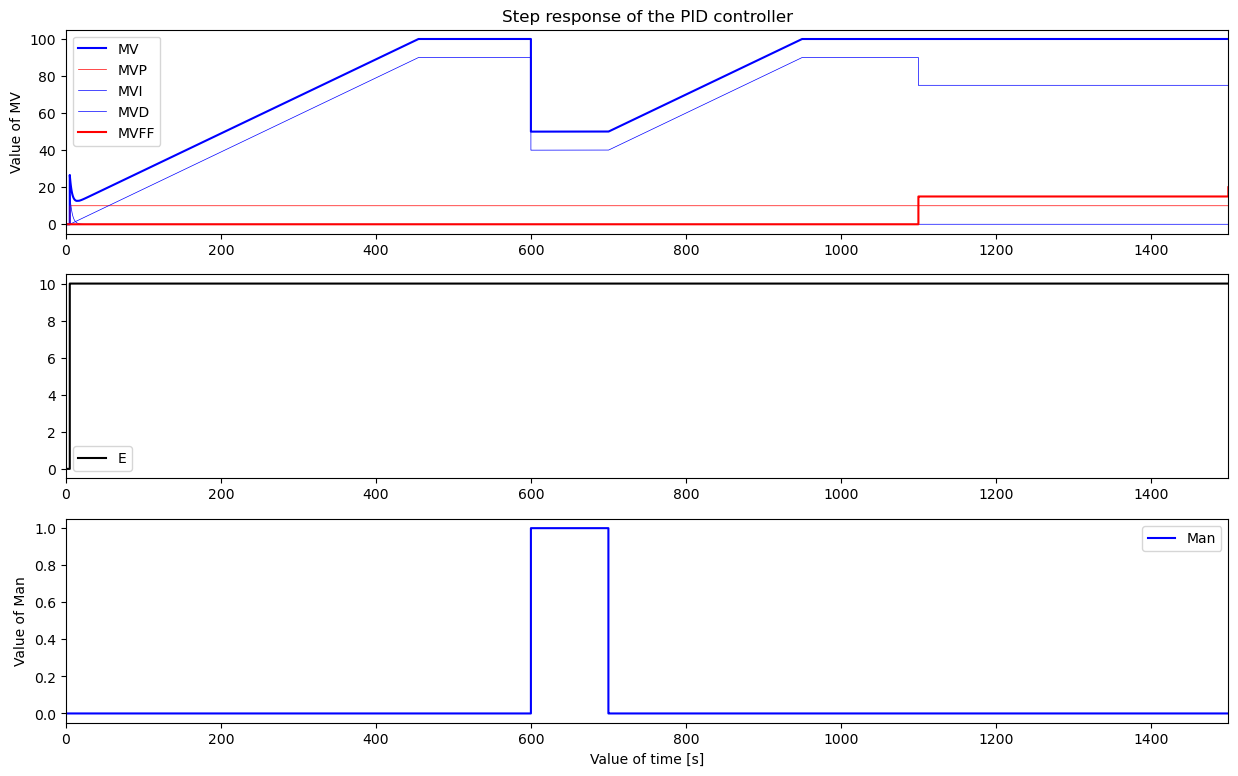

In [21]:
TSim = 1500
Ts = 0.01
N = int(TSim/Ts) + 1

# Paths
ManPath = {0: False, 600: True, 700:False, TSim : False}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}
MVManPath = {0:50, TSim:50}
MVFFPath = {0:0, 1100: 15, TSim : 20}


SP = []
t = []
MV = []
PV = []
DV = []
Man = []
MVMan = []
MVFF = []
E = []
MVP = []
MVI = []
MVD = []

# Parameters
Kc = 1
Ti = 50
Td = 5
alpha = 0.6
MVMin = 0
MVMax = 100


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(ManPath, t,Man)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(MVFFPath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, False)

    
plt.figure(figsize = (15,9))

plt.subplot(3,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVP,'r-',linewidth=0.5,label='MVP',where='post')
plt.step(t,MVI,'b-',linewidth=0.5,label='MVI',where='post')
plt.step(t,MVD,'b-',linewidth=0.5,label='MVD',where='post')
plt.step(t,MVFF,'r-',label='MVFF',where='post')
plt.ylabel('Value of MV')
plt.title('Step response of the PID controller')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(3,1,2)
plt.step(t,E,'black',label='E',where='post')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(3,1,3)  
plt.step(t,Man,'b-',label='Man',where='post')
plt.ylabel('Value of Man')
plt.xlabel('Value of time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

# IMCTuning()

In [ ]:
help(IMCTuning)

Help on function IMCTuning in module package_LAB:

IMCTuning(Kp, T1p, T2p, thetap, gamma)
    The function "IMC" returns optimised PID controller settings for a FOPDT or SOPDT process.

IMCTuning computes the IMC PID tuning parameters for FOPDT and SOPDT processes.
    K: process gain (Kp)
    Tlag1: first (main) lag time constant [s]
    Tlag2: second lag time constant [s]
    theta: delay [s

    The function "IMC" returns the values of Kc, Ti and Td.]

In [27]:
# Function to update and print PID parameters
def update_PID_parameters(gamma):
    Kp = 0.47
    T1p = 140
    T2p = 30
    thetap = 6

    # Calculate PID parameters
    Kc, Ti, Td = IMCTuning(Kp, T1p, T2p, thetap, gamma)

    # Print PID parameters
    print("\rKc = {:.2f}, Ti = {:.2f}, Td = {:.2f}".format(Kc, Ti, Td), end='')

# Create interactive slider
gamma_slider = FloatSlider(value=0.55, min=0.2, max=0.8, step=0.01, description='Gamma:')

# Create output widget for displaying PID parameters
out = Output()

# Function to handle slider change event
def on_slider_change(change):
    gamma = change['new']
    
    # Clear previous output
    with out:
        clear_output(wait=True)
        
        # Update and print PID parameters
        update_PID_parameters(gamma)

# Link slider change event to handler function
gamma_slider.observe(on_slider_change, names='value')

# Display widgets
display(gamma_slider, out)

# Initial display of PID parameters
update_PID_parameters(0.55)  # Display initial values

FloatSlider(value=0.55, description='Gamma:', max=0.8, min=0.2, step=0.01)

Output()

Kc = 4.36, Ti = 170.00, Td = 24.71

# Margin_gain_phase()

In [ ]:
help(Margin_gain_phase)

Help on function Margins in module package_LAB:

Margi_gain_phasens(P, C, omeu
    P: Process as defined by the class "Process".
        Use the following command to define the default process which is simply a unit gai  process:1'] = 150             
    :C: PID controller as defined by the class "
Contrller" 
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, is returThe function "Margin_gain_phase" generates the Bode diagram of the loop P * C and computes its gain and phase marginsnd phase marginsin and phase marginse)

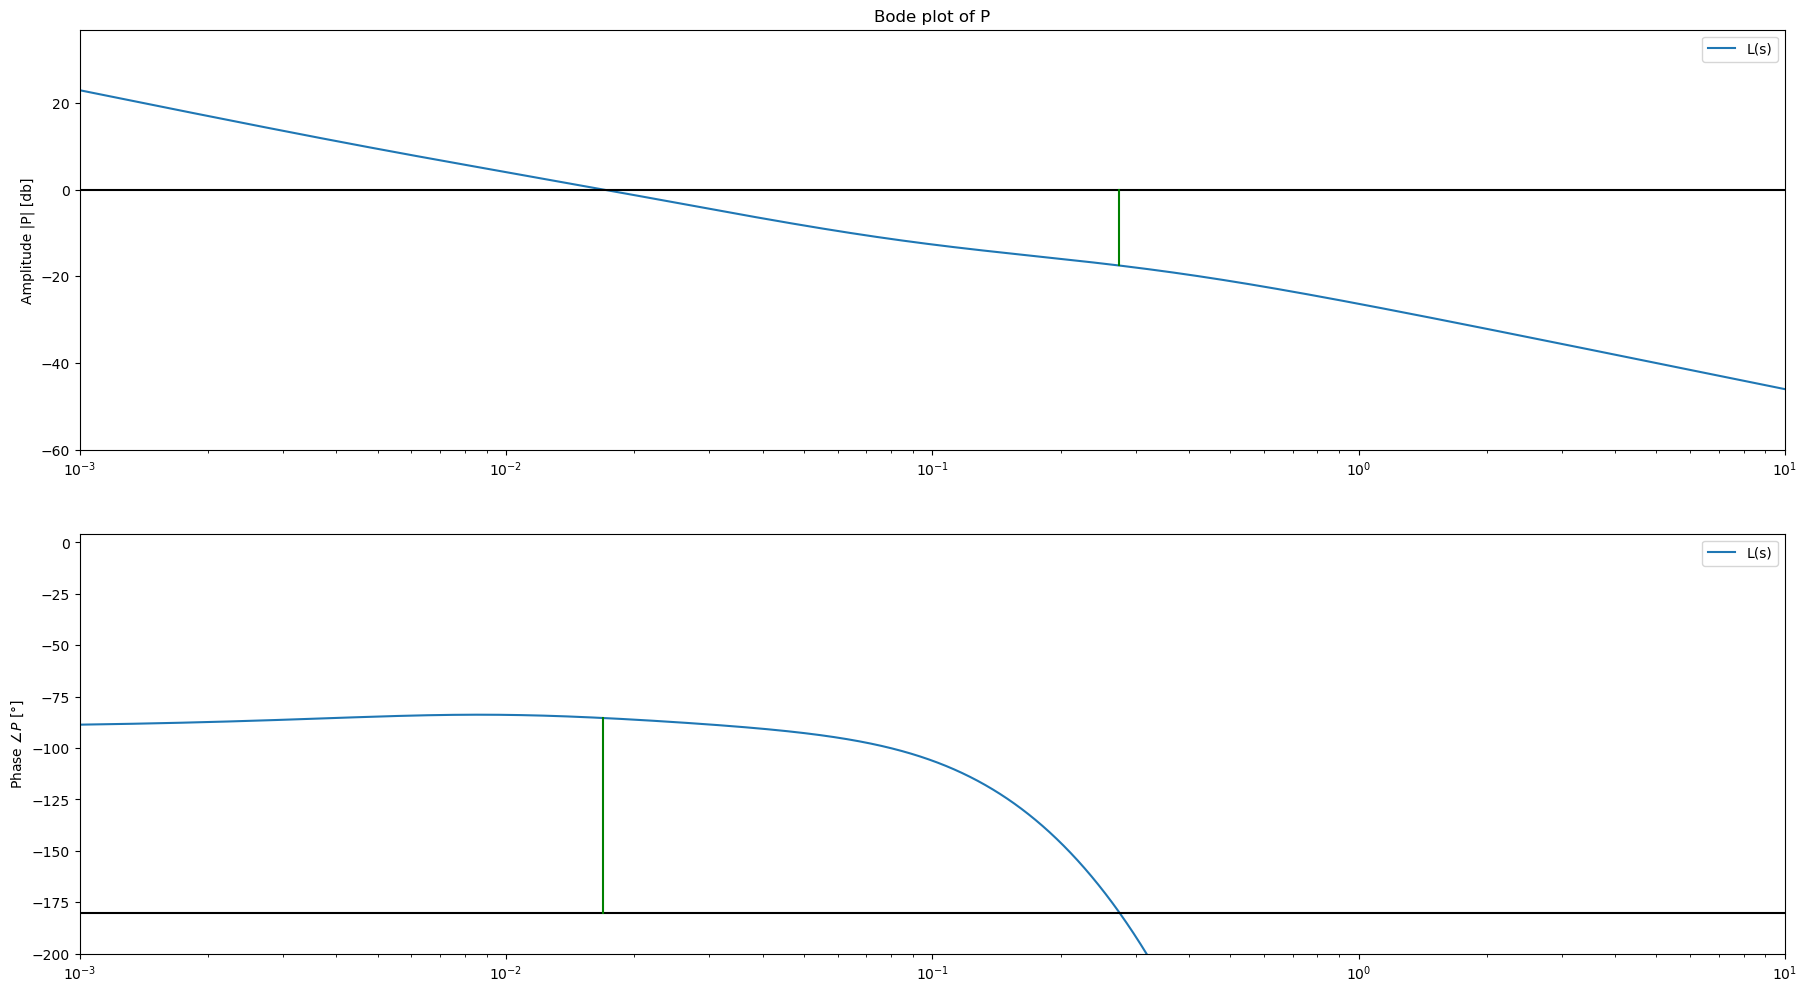

Gain margin: 17.500027943129172 dB at the ultimate frequency: 0.2738064940527687 rad/s
Phase margin: 94.60429400271744° at the crossover frequency: 0.01689362199201788 rad/s


In [23]:
# Définition des paramètres du processus
process_params = {
    'Kp': 0.42,
    'Tlag1': 93.5,
    'Tlag2': 0,
    'theta': 7.4
}

# Création de l'objet Process
P = Process(process_params)

# Paramètres pour le réglage du contrôleur PID
T1p = 119  # Temps de montée
T2p = 6    # Temps de montée
thetap = 6 # Retard
gamma = 0.55

# Calcul des paramètres du contrôleur PID
Kc, Ti, Td = IMCTuning(P.parameters['Kp'], T1p, T2p, thetap, gamma)

# Création de l'objet Controller
C = Process({
    'Kc': Kc,
    'Ti': Ti,
    'Td': Td,
    'Tfd': alpha * Td  # Temps de dérivation après filtrage
})

# Définition de la plage de fréquence pour l'analyse
omega = np.logspace(-3, 1, 10000)

# Calcul de la fonction de transfert du processus
Ps = Bode(P, omega, Show=False)

# Calcul et affichage de la marge de gain et de phase
Margin_gain_phase(Ps, C, omega)
